In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score


C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
student_df = pd.read_csv('./Downloads/student-por.csv')
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


HANDLING MULTI-COLINEARITY

<AxesSubplot:>

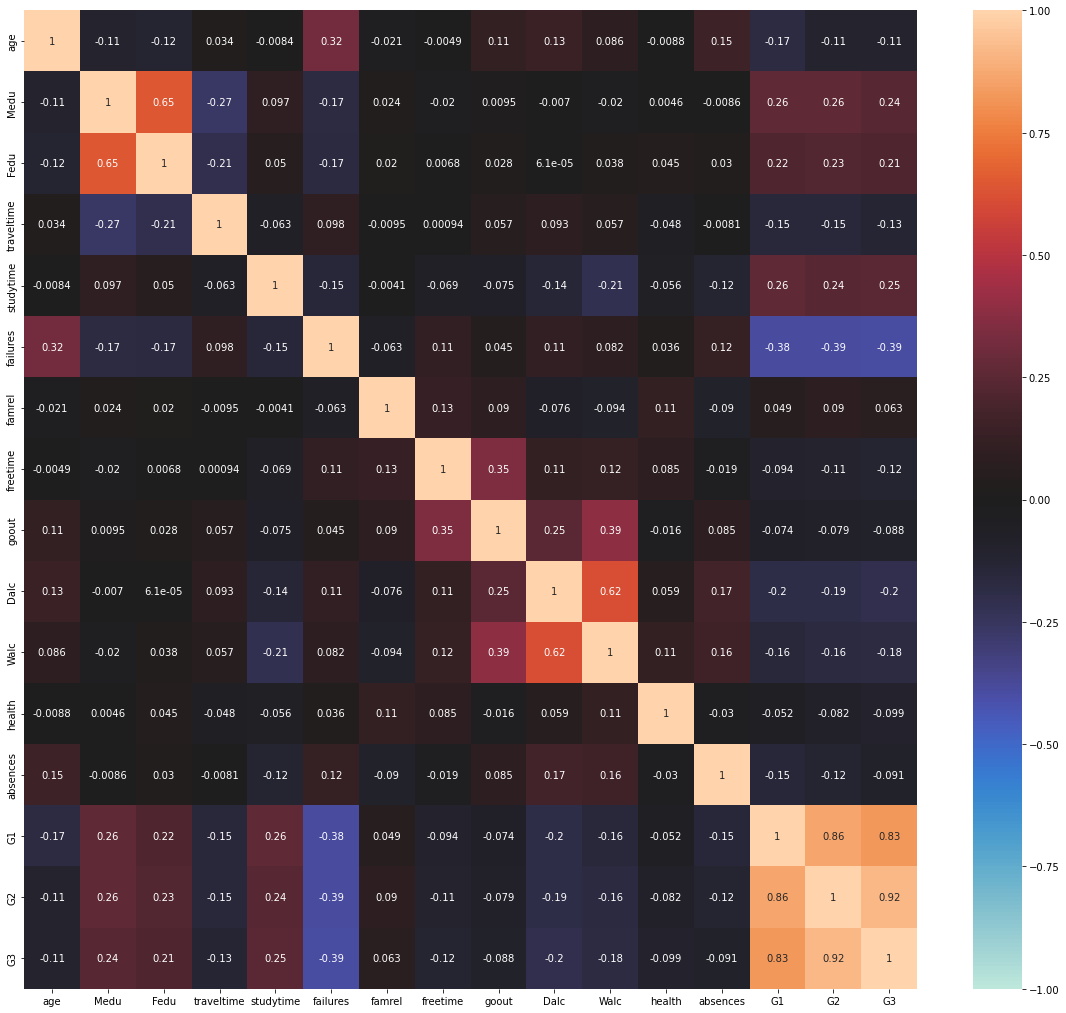

In [5]:
plt.figure(figsize=(20,18))

corr = student_df.corr()
sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

since both G1 AND G2 have high correlation with the target variable, G3, we'll find the average of the two columns

In [6]:
#finding the average of columns G1 and G2 and adding it as a column to the existing dataframe
G_average = student_df['G1'] + student_df['G2'] / 2
student_df['G_average'] = G_average
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,14.5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,18.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,21.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,15.5
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,22.5
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,17.0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,15.0


In [7]:
#dropping columns G1 and G2
student_df.drop(['G1', 'G2'], axis = 1, inplace = True)

In [8]:
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G_average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,14.5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,18.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,21.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,15.5
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,16,22.5
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,9,17.0
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,15.0


CHECKING FOR SKEWNESS IN THE COLUMNS

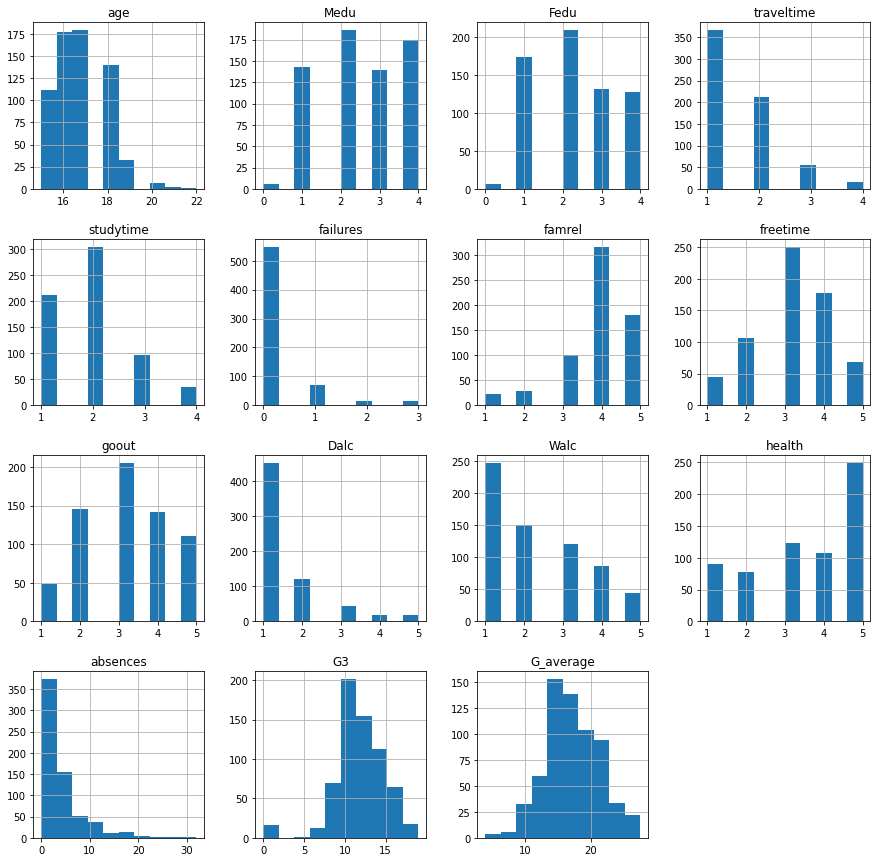

In [9]:

student_df.hist(bins=10, figsize=(15,15))
plt.show();

VISUALIZING SOME COLMNS THAT APPEARED TO BE SKEWED

Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS' FINAL GRADE")

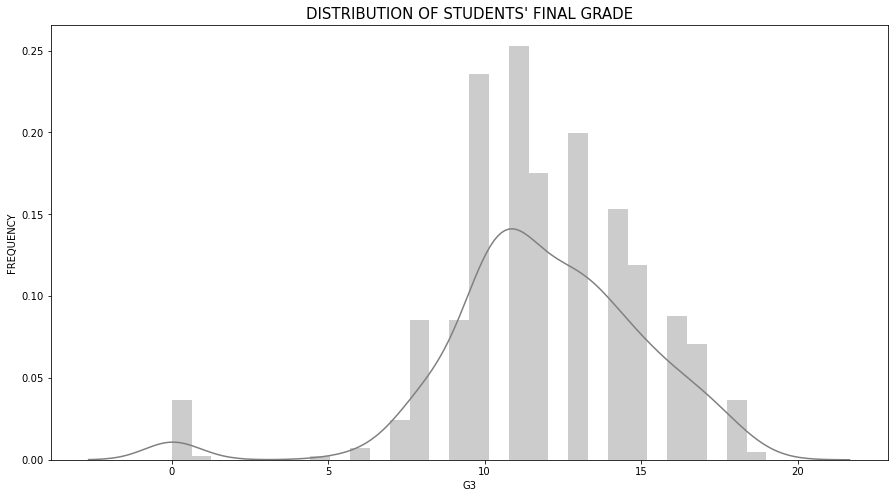

In [10]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['G3'], hist=True, bins=30, color='grey')

plt.xlabel('G3')
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS' FINAL GRADE",fontsize = 15)

Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS' AGES")

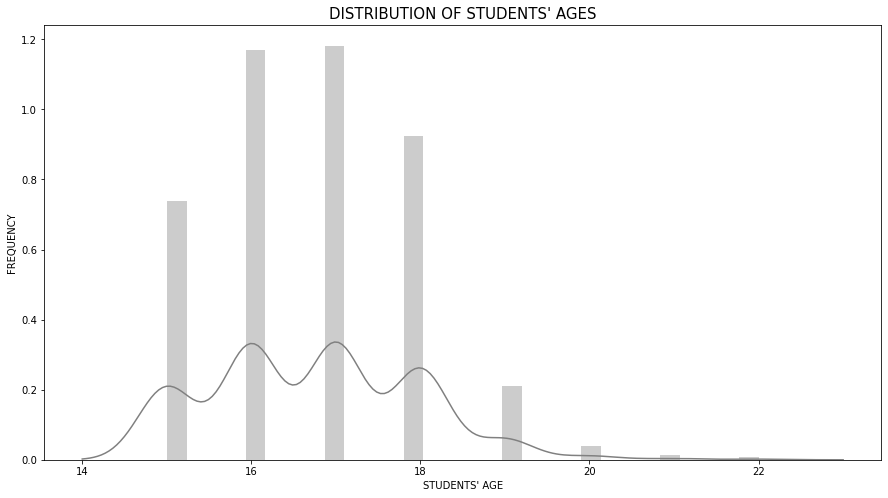

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['age'], hist=True, bins=30, color='grey')

plt.xlabel("STUDENTS' AGE")
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS' AGES",fontsize = 15)

Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS'WORKDAY ALCOHOL CONSUMPTION")

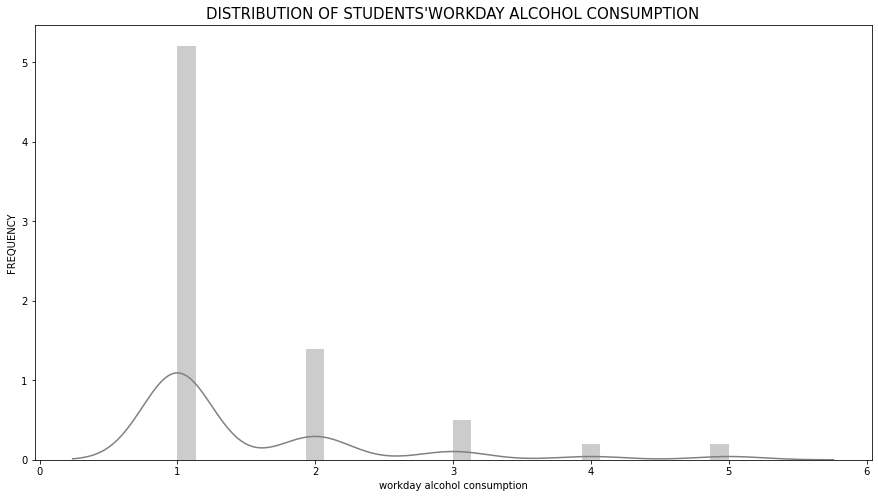

In [12]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['Dalc'], hist=True, bins=30, color='grey')

plt.xlabel('workday alcohol consumption')
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS'WORKDAY ALCOHOL CONSUMPTION",fontsize = 15)

Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS' NUMBER OF PAST CLASS FAILURES")

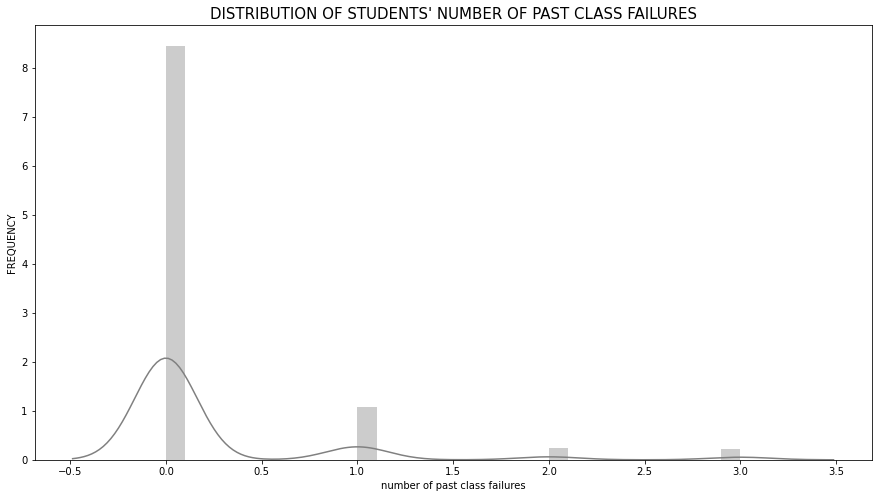

In [13]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['failures'], hist=True, bins=30, color='grey')



plt.xlabel('number of past class failures')
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS' NUMBER OF PAST CLASS FAILURES",fontsize = 15)

Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS' NUMBER OF SCHOOL ABSENCES")

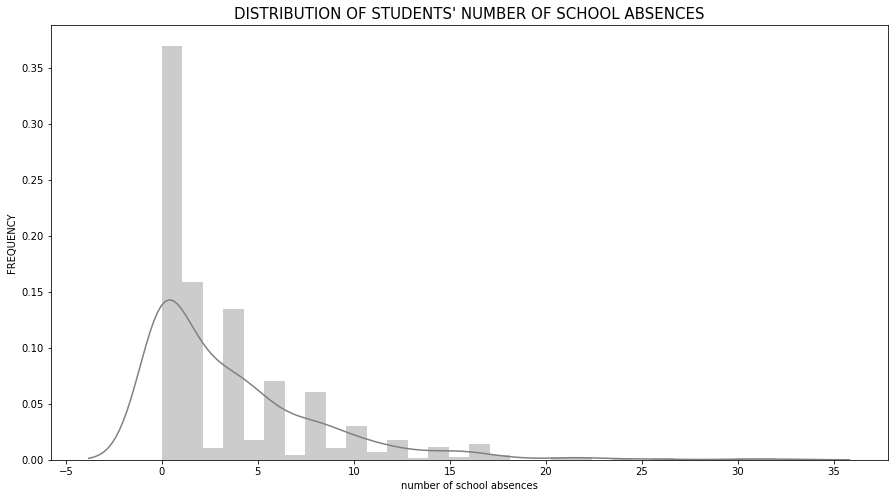

In [14]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['absences'], hist=True, bins=30, color='grey')


plt.xlabel('number of school absences')
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS' NUMBER OF SCHOOL ABSENCES",fontsize = 15)

Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS' QUALITY OF FAMILY RELATIONSHIPS")

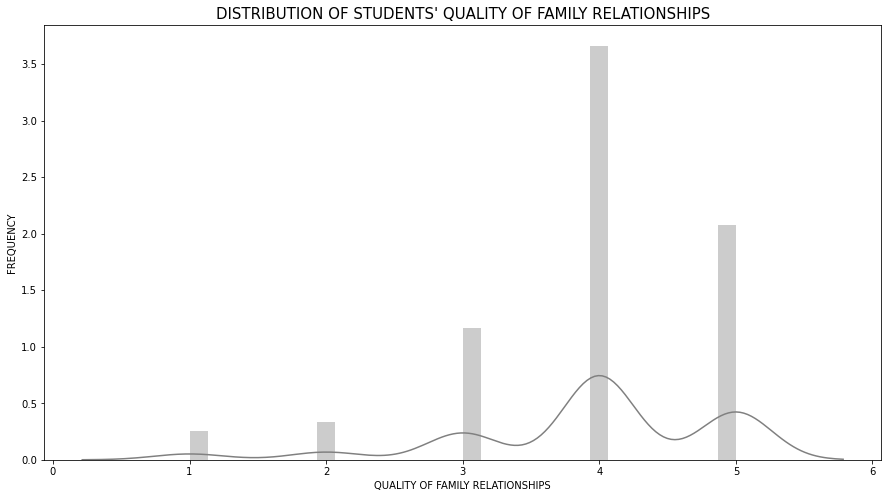

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['famrel'], hist=True, bins=30, color='grey')

plt.xlabel('QUALITY OF FAMILY RELATIONSHIPS')
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS' QUALITY OF FAMILY RELATIONSHIPS",fontsize = 15)

now that we haved noticed skewness in the dataset, we will have to scale the dataset.
before scaling and encoding, it is important to split the data into train and test sets. This is necessary to avoid bias or leakage in your analysis. 


ENCODING

In [16]:
#making a copy of the dataset
student_df1 = student_df.copy()


columns_to_encode = ['school', 'sex', 'address', 'famsize',
                     'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                     'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'higher', 'internet', 'romantic']

# Create dummy variables for categorical columns in training data
encoded_data = pd.get_dummies(student_df1[columns_to_encode], columns=columns_to_encode)

new_train_df = pd.concat([encoded_data, student_df1.drop(columns_to_encode, axis=1)], axis=1)
encoded_student_df = new_train_df
encoded_student_df

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G_average
0,1,0,1,0,0,1,1,0,1,0,...,0,4,3,4,1,1,3,4,11,5.5
1,1,0,1,0,0,1,1,0,0,1,...,0,5,3,3,1,1,3,2,11,14.5
2,1,0,1,0,0,1,0,1,0,1,...,0,4,3,2,2,3,3,6,12,18.5
3,1,0,1,0,0,1,1,0,0,1,...,0,3,2,2,1,1,5,0,14,21.0
4,1,0,1,0,0,1,1,0,0,1,...,0,4,3,2,1,2,5,0,13,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,1,0,1,0,0,1,...,1,5,4,2,1,2,5,4,10,15.5
645,0,1,1,0,0,1,0,1,0,1,...,0,4,3,4,1,1,1,4,16,22.5
646,0,1,1,0,0,1,1,0,0,1,...,0,1,1,1,1,1,5,6,9,17.0
647,0,1,0,1,0,1,0,1,0,1,...,0,2,4,5,3,4,2,6,10,15.0


SPLITTING THE DATASET

In [18]:
# Split the data into training and testing sets
X = encoded_student_df.drop(['G3'], axis = 1)
y = encoded_student_df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


NOW THAT THE COLUMNS HAVE BEEN ENCODED, LET'S SCALE THE DATA

In [28]:

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the training data
scaled_y_train = scaler.fit_transform(y_train)

# Transform the testing data using the fitted scaler
scaled_y_test = scaler.transform(y_test)


# Convert the scaled arrays back to dataframes
scaled_y_train_df = pd.DataFrame(scaled_y_train, columns = ['G3'])
scaled_y_test_df = pd.DataFrame(scaled_y_test, columns = ['G3'])

scaled_y_train_df

,G3
0,-0.888075
1,0.054683
2,0.368935
3,-0.259570
4,0.054683
...,...
449,-0.573822
450,-0.573822
451,0.997440
452,-0.573822


In [29]:
scaled_y_test_df

,G3
0,2.254450
1,0.054683
2,1.940198
3,-0.259570
4,-0.259570
...,...
190,-0.573822
191,-1.202327
192,-0.259570
193,-0.573822


NOW THE DATASET IS READY FOR MODEL TRAINING

MODELS:

*Linear Regression

*Decision Trees Regressor

*Random Forest Regressor

*Support vector Regressor.

*Lasso Regression

*Ridge Regression

Now, instead of repeating lines of code, while fitting and predicting with the models, we setup a dictionary with the models in it, and create a function to fit and score the models.

In [30]:
#dictionary
Models = {'Lin_reg': LinearRegression(), 'decision_trees': DecisionTreeRegressor(),
          'Random_forest': RandomForestRegressor(), 'svm' : SVR(), 'Lasso': Lasso(),
          'Ridge': Ridge()}

#function to fit and score models
def fit_and_score_model (Models, X_train,y_train, X_test, y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in Models.items():
    #name = key, model = values (of the dictionary created)
        model.fit(X_train, y_train) #fit model to data
        model_score[name] = model.score(X_test, y_test) #model score
    return model_score

In [34]:
#call out the function
score = fit_and_score_model(Models = Models, X_train = X_train,
                    y_train = y_train, X_test = X_test, y_test = y_test)

score

{'Lin_reg': 0.7856914349193361,
 'decision_trees': 0.6136970077481771,
 'Random_forest': 0.8101234535751487,
 'svm': 0.7719193303118851,
 'Lasso': 0.800174485880694,
 'Ridge': 0.7861825471461061}

EVALUATION METRICS

In [35]:
#function to get the metrics 

def get_metrics(models, X_test, y_test):
    metrics = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        metrics[name] = [mae, mse, rmse, r2]
    return pd.DataFrame.from_dict(metrics, orient='index', columns=['MAE', 'MSE', 'RMSE', 'R2'])

In [36]:
#call out the function
metrics_df = get_metrics(models=Models, X_test=X_test, y_test=y_test)
metrics_df

,MAE,MSE,RMSE,R2
Lin_reg,1.039176,2.369855,1.539433,0.785691
decision_trees,1.256410,4.271795,2.066832,0.613697
Random_forest,0.932462,2.099683,1.449028,0.810123
svm,0.923270,2.522149,1.588128,0.771919
Lasso,0.906533,2.209700,1.486506,0.800174
Ridge,1.037261,2.364425,1.537669,0.786183
